<a href="https://colab.research.google.com/github/hareeharan03/online-shoppers-intention/blob/main/online_shoppers_intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import warnings
pd.options.mode.chained_assignment = None

# Data_exploration 

In [10]:
data_set=pd.read_csv("/content/drive/MyDrive/machine_learing_cw/Coursework_1_data.csv") #loc where the dataset is located
data_set.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [11]:
data_set.shape

(12330, 18)

In [12]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [13]:
data_set.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [14]:
numerical_value=list(data_set.select_dtypes(['int64','float64']).columns)

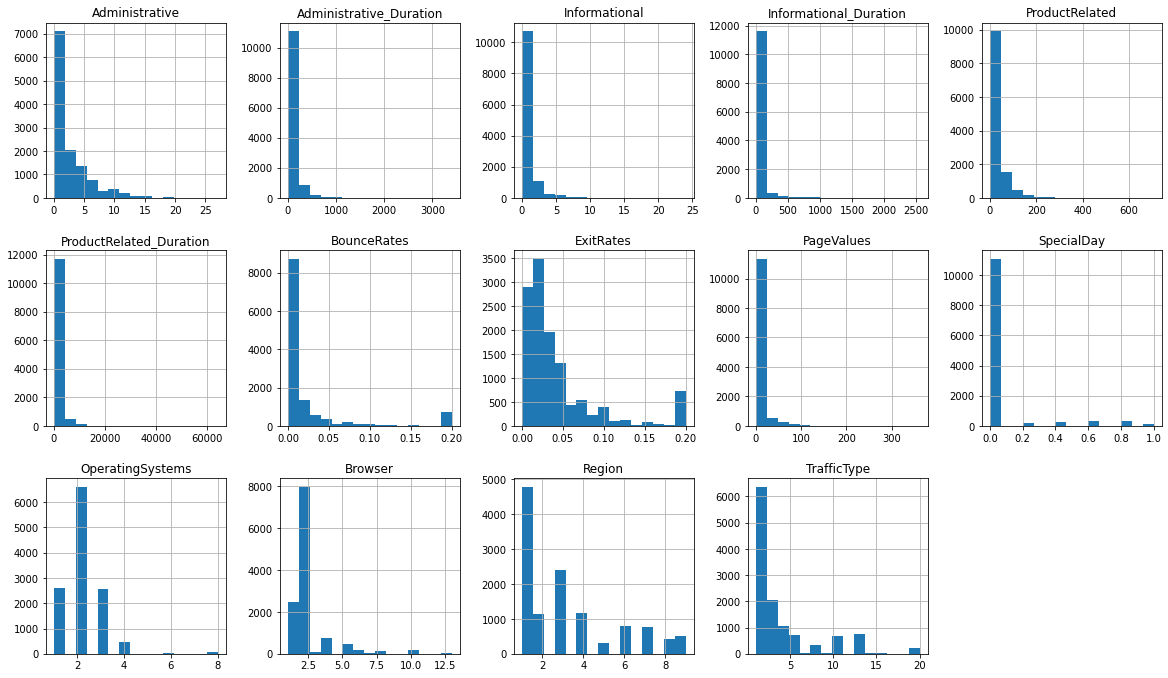

In [15]:
data_set[numerical_value].hist(bins=15, figsize=(20, 20), layout=(5, 5));

In [16]:
#sns.pairplot(data_set, hue="Revenue",size=3)
#plt.show()

In [17]:
categorical_value=list(data_set.select_dtypes(['object','bool']).columns)

In [18]:
for i in categorical_value:
    print(i,'\n')
    print(data_set[i].value_counts())
    print('-----------------------------------------------')

Month 

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
-----------------------------------------------
VisitorType 

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
-----------------------------------------------
Weekend 

False    9462
True     2868
Name: Weekend, dtype: int64
-----------------------------------------------
Revenue 

False    10422
True      1908
Name: Revenue, dtype: int64
-----------------------------------------------


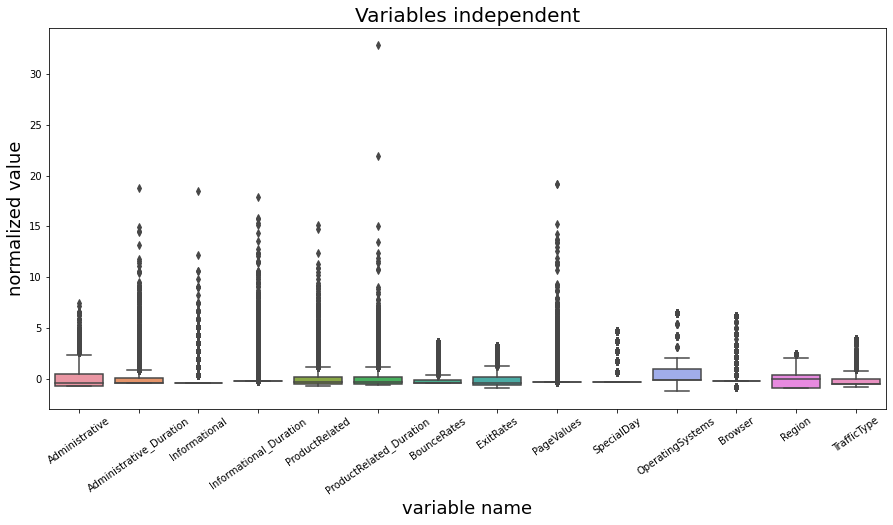

In [19]:
# Normalized of numerical independent variables for visualization

X_normal = (data_set[numerical_value]-data_set[numerical_value].mean())/data_set[numerical_value].std()

# Boxplots of each variables
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X_normal)
ax.set_xticklabels(ax.get_xticklabels(),rotation=35)
plt.title('Variables independent', fontsize=20)
plt.ylabel('normalized value', fontsize=18)
_ = plt.xlabel('variable name', fontsize=18)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


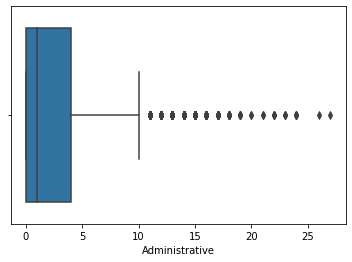

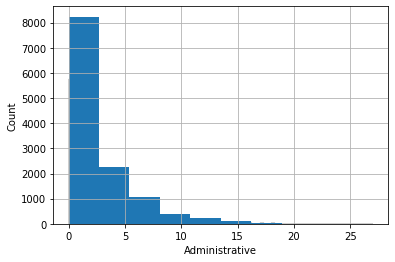

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


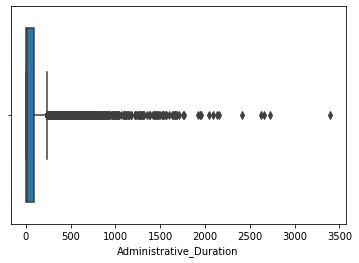

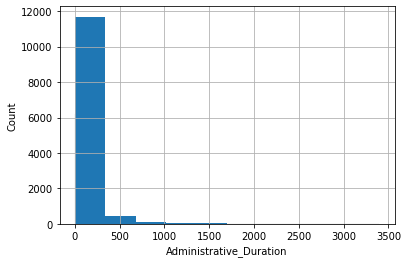

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


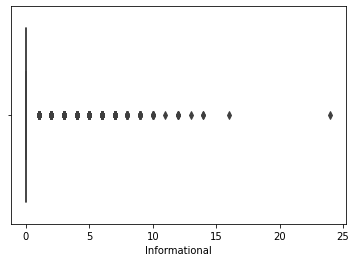

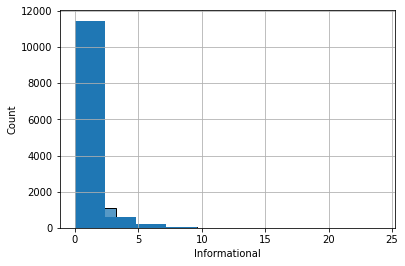

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


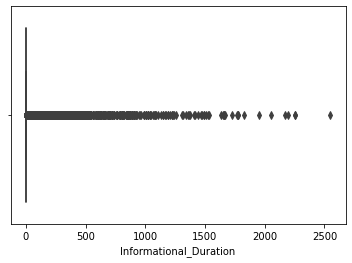

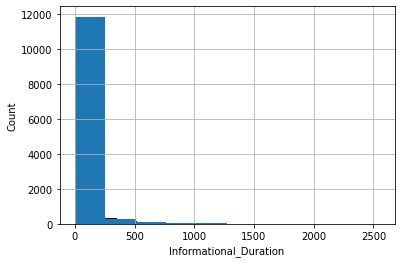

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


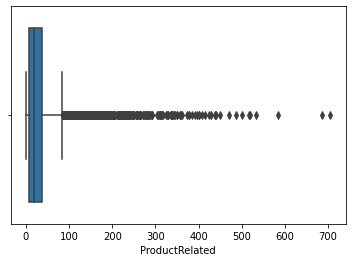

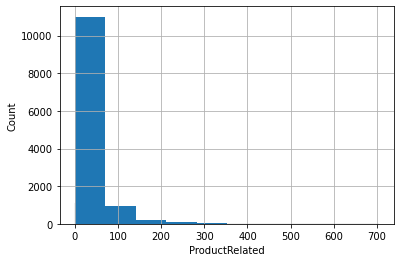

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


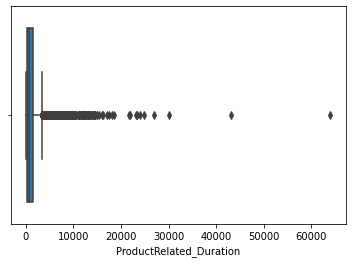

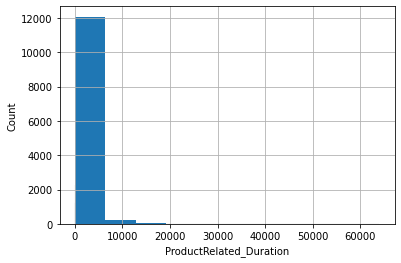

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


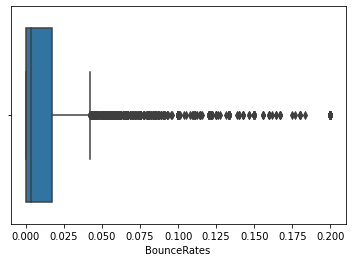

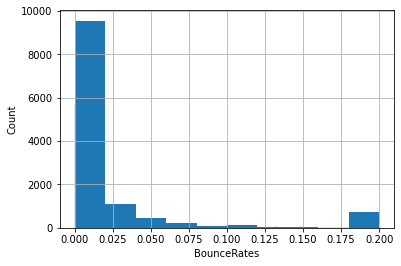

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


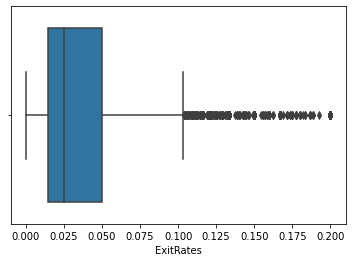

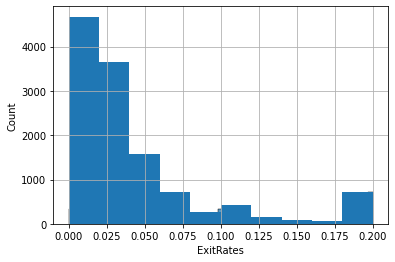

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


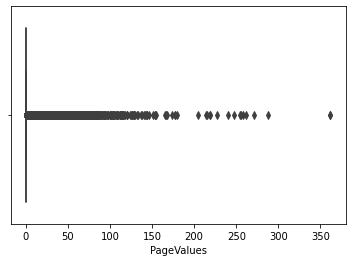

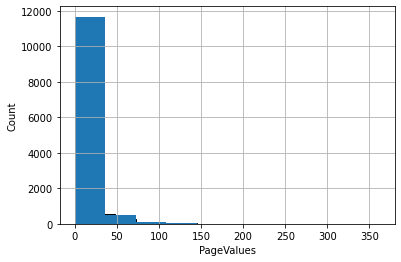

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


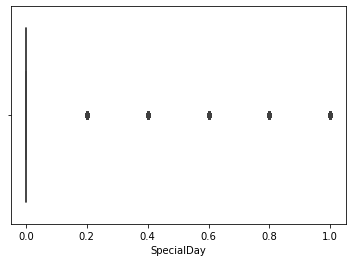

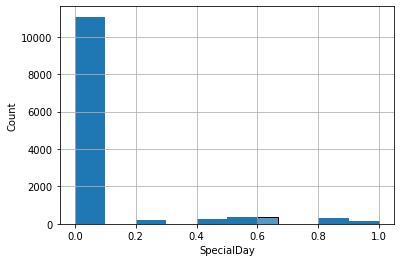

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


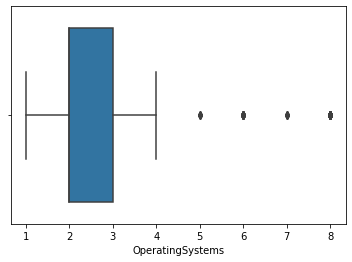

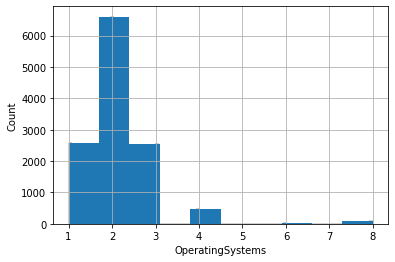

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


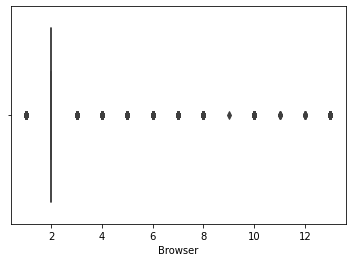

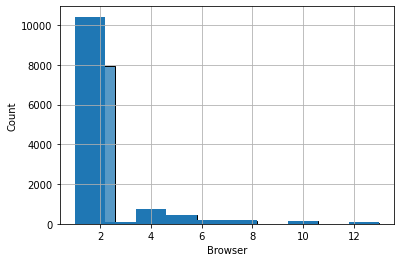

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


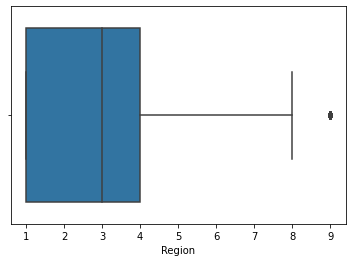

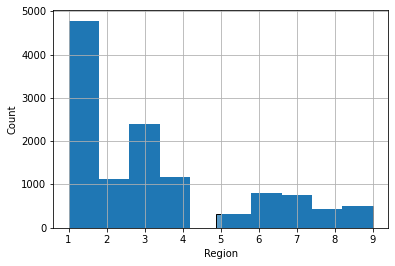

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


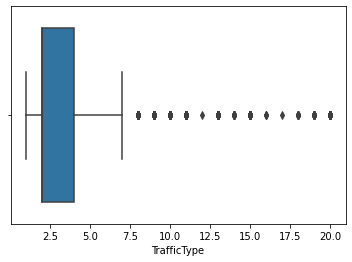

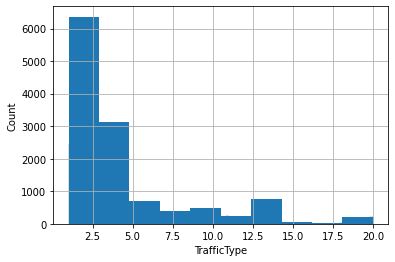

In [20]:
for i in (numerical_value):
  sns.boxplot(data_set[i])
  plt.show()
  sns.histplot(data_set[i])
  data_set[i].hist()
  plt.show()
warnings.simplefilter(action="ignore", category=FutureWarning)

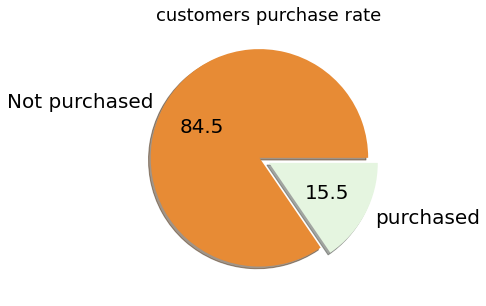

In [21]:
plt.figure(figsize=(5,5))
labels =  ['Not purchased', 'purchased']
plt.pie(data_set['Revenue'].value_counts(),autopct='%1.1f',textprops={'fontsize': 20},explode =(0.1,0),
       colors=['#e78B35','#e5f5e0'],labels=labels,shadow=True)
plt.title('customers purchase rate', fontsize = 18)
plt.ylabel('')
plt.show()

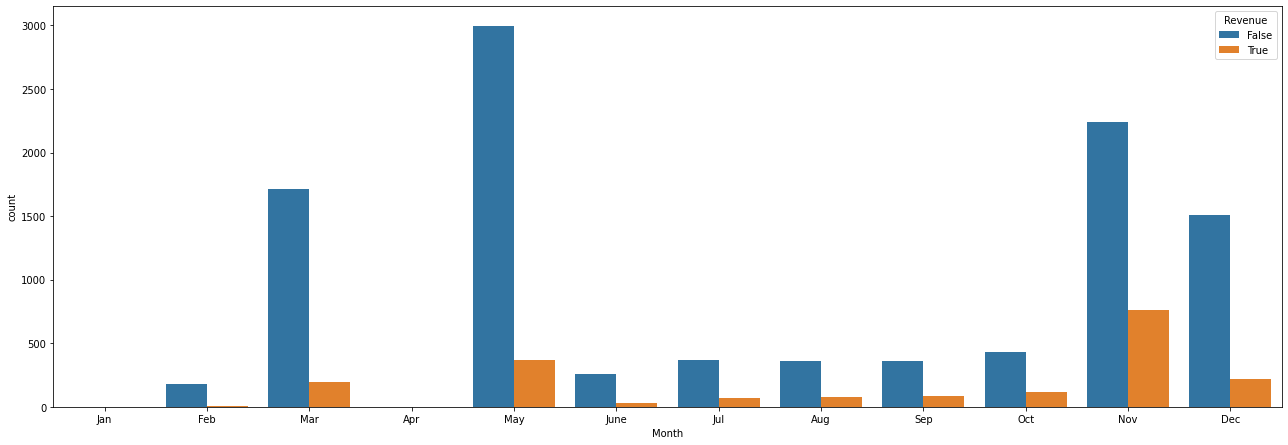

In [22]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=data_set, x='Month', hue='Revenue', ax=ax1, order=orderlist)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'count')

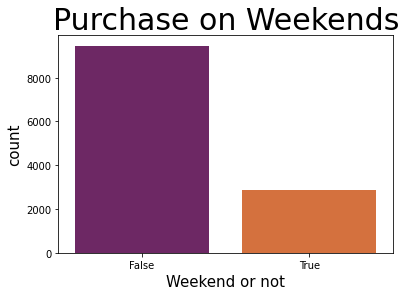

In [23]:
# checking the Distribution of customers on Weekend
sns.countplot(data_set['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

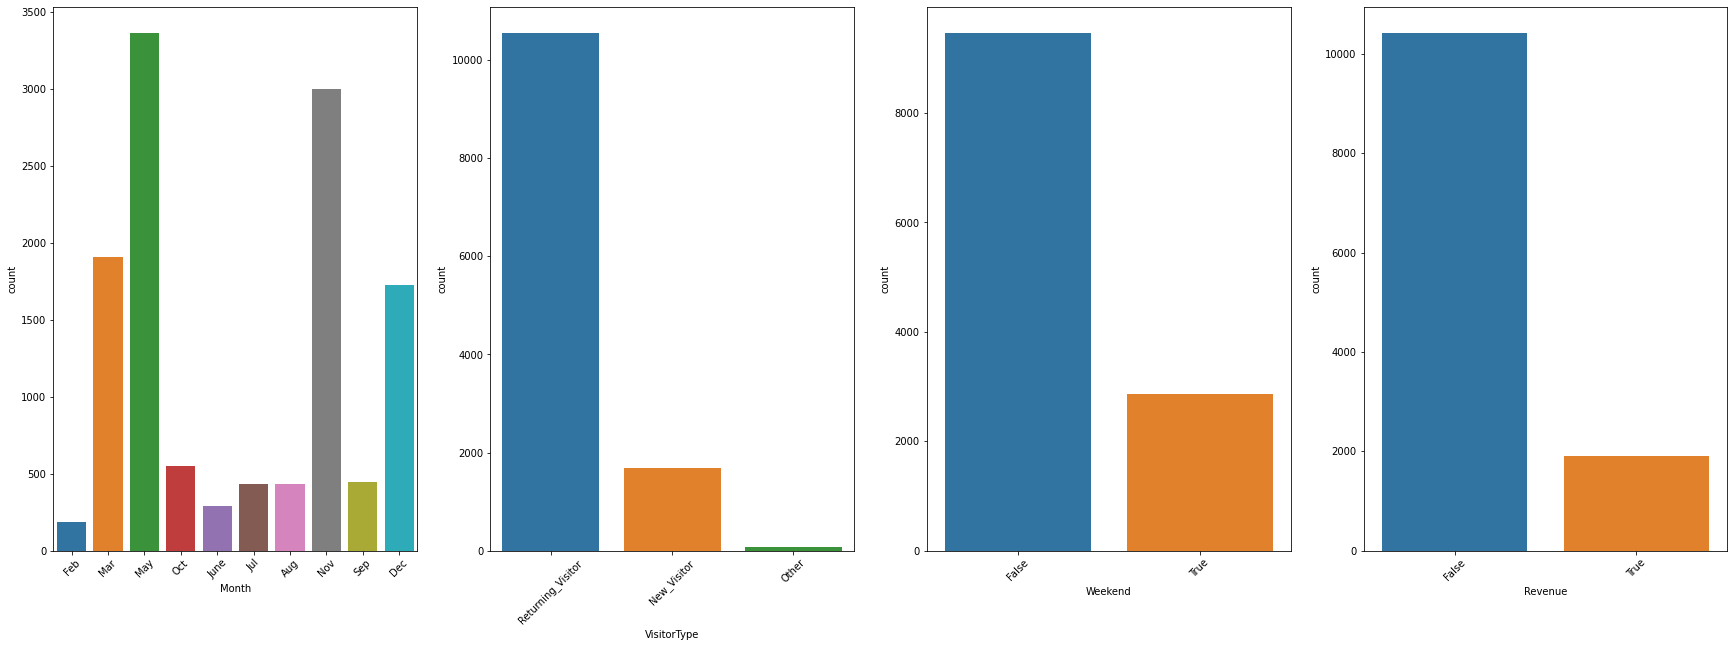

In [24]:
fig, ax = plt.subplots(1, 4, figsize=(30, 10))
for variable, subplot in zip(categorical_value, ax.flatten()):
    sns.countplot(data_set[variable], ax=subplot)
    for label in subplot.get_xticklabels():
      plt.rc('ytick', labelsize=20)
      plt.rc('xtick', labelsize=14)
      label.set_rotation(45)

In [25]:
matrix=data_set.corr()

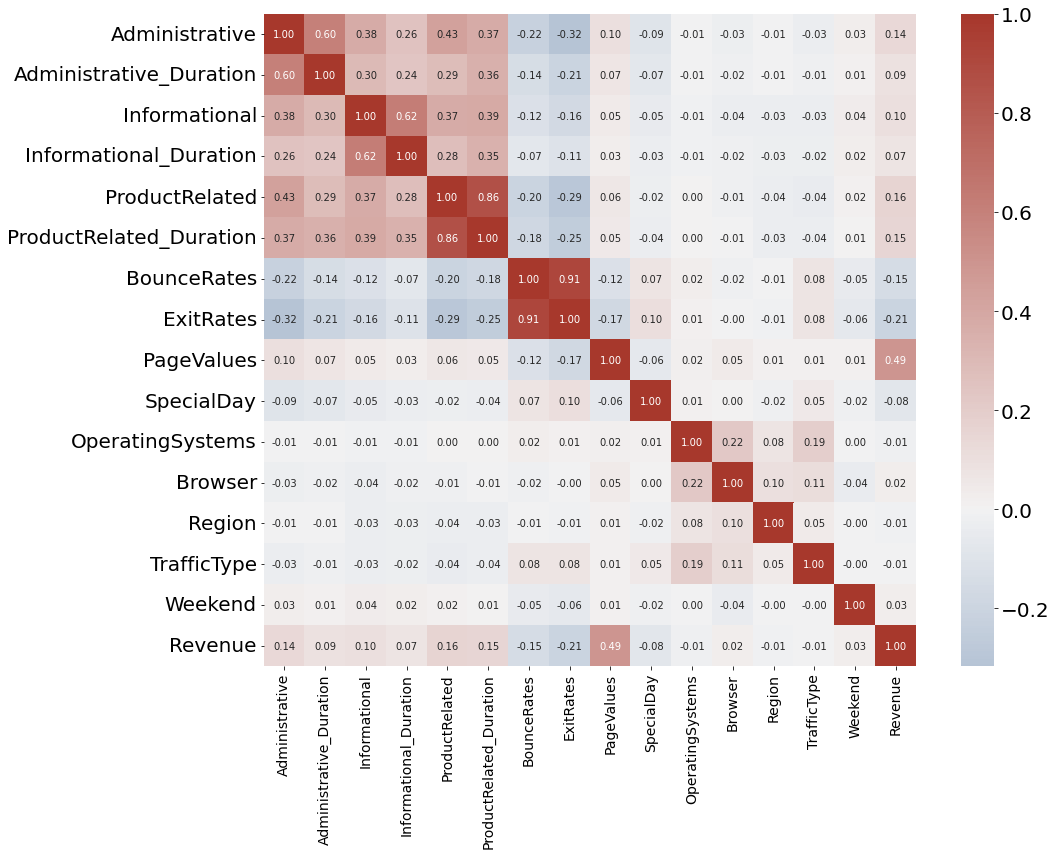

In [26]:
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

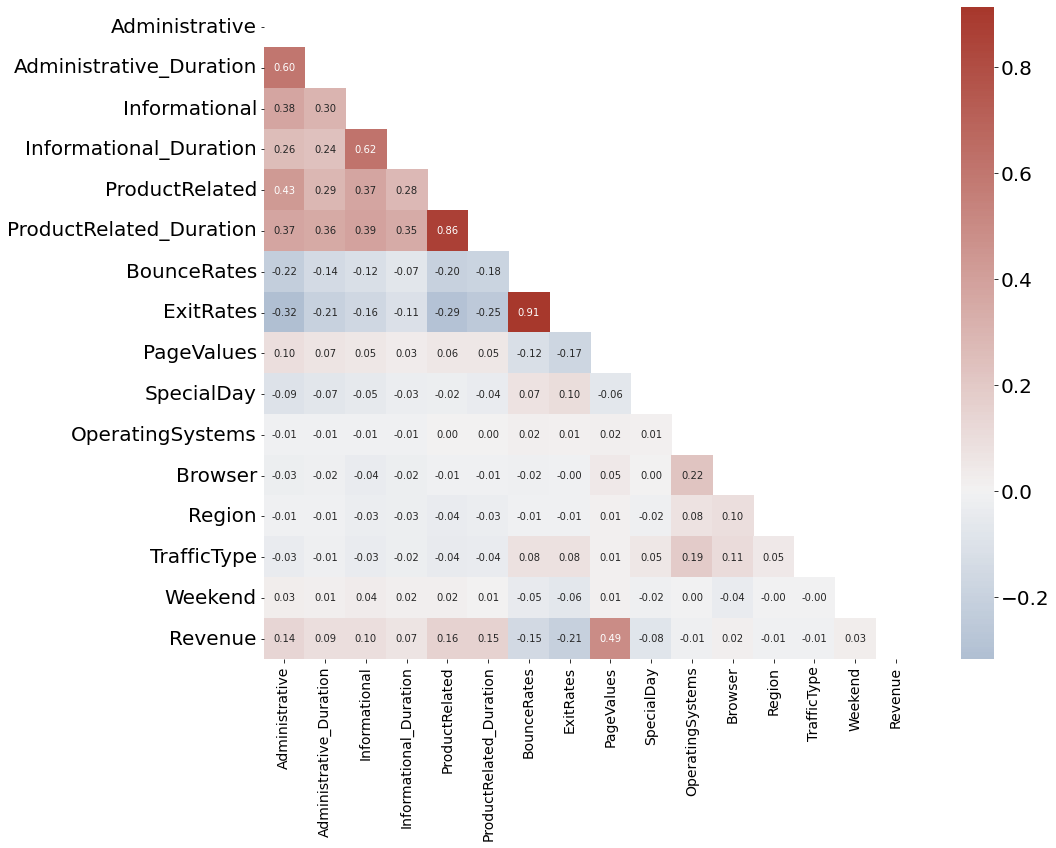

In [27]:
# Create a mask
plt.figure(figsize=(16,12))

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

In [28]:
data_set.corr()['Revenue']

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
OperatingSystems          -0.014668
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

# **data_preprocessing**

**encoding using label encoder**

In [29]:
data_set.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [30]:
data_set.Weekend = data_set.Weekend.astype('int')
data_set.Revenue = data_set.Revenue.astype('int')

In [31]:
non_numerical_col = data_set.columns[(data_set.dtypes =='object').values].tolist()
non_numerical_col

['Month', 'VisitorType']

In [32]:
data_set.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [33]:
data_set.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [34]:
data_set.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [35]:
data_set.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [36]:
for col in non_numerical_col:
  le=preprocessing.LabelEncoder()
  data_set[col]=le.fit_transform(data_set[col])

In [37]:
data_set.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
Revenue                      int64
dtype: object

In [38]:
data_set.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


**preprocessing**

In [39]:
data_set.duplicated().sum()

125

In [40]:
data_set=data_set.drop_duplicates()

In [41]:
data_set.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**data spliting**

In [42]:
features = data_set.drop(['Revenue'], axis=1)
label = data_set['Revenue']

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit 

splitter=StratifiedShuffleSplit(n_splits=4, test_size=0.2,random_state=12)

for train,test in splitter.split(features,label): 
    x_train = features.iloc[train]
    y_train = label.iloc[train]
    x_test  = features.iloc[test]
    y_test  = label.iloc[test]
print(y_train.value_counts())  
print(y_test.value_counts())

0    8238
1    1526
Name: Revenue, dtype: int64
0    2059
1     382
Name: Revenue, dtype: int64


In [44]:
x_train.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int64
dtype: object

In [45]:
outliers=['Administrative', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates','OperatingSystems','TrafficType']

removing outliers for columns which has data in quantile as well as has upper bound and lower bound

In [46]:
for x in outliers:
    q75,q25 = np.percentile(x_train.loc[:,x],[75,25])
    intr_qr = q75-q25
    print('-'*8,x,'-'*8)
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    print('max=',max,'\n','min=',min)
 
    x_train.loc[x_train[x] < min,x] = np.nan
    x_train.loc[x_train[x] > max,x] = np.nan

-------- Administrative --------
max= 10.0 
 min= -6.0
-------- ProductRelated --------
max= 83.0 
 min= -37.0
-------- ProductRelated_Duration --------
max= 3357.1979175000006 
 min= -1699.9187505000002
-------- BounceRates --------
max= 0.040044643125 
 min= -0.024026785874999998
-------- ExitRates --------
max= 0.09785350274999999 
 min= -0.03610504324999999
-------- OperatingSystems --------
max= 4.5 
 min= 0.5
-------- TrafficType --------
max= 7.0 
 min= -1.0


In [47]:
x_train.isnull().sum()

Administrative              310
Administrative_Duration       0
Informational                 0
Informational_Duration        0
ProductRelated              783
ProductRelated_Duration     770
BounceRates                1145
ExitRates                  1043
PageValues                    0
SpecialDay                    0
Month                         0
OperatingSystems             87
Browser                       0
Region                        0
TrafficType                1659
VisitorType                   0
Weekend                       0
dtype: int64

In [48]:
for i in outliers:
 x_train.loc[x_train.loc[:,i].isnull(),i]=x_train.loc[:,i].median()
 
x_train.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

**balancing dataset with SMOTE**

In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_oversampled, y_train_oversampled = sm.fit_resample(x_train, y_train.ravel())

print('before x_train sampling: {}'.format(x_train.shape))
print('before y_train sampling: {}'.format(y_train.shape),'\n')

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)),'\n')

print('before OverSampling, the shape of train_X: {}'.format(X_train_oversampled.shape))
print('before OverSampling, the shape of train_y: {} \n'.format(y_train_oversampled.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_oversampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_oversampled == 0)))

before x_train sampling: (9764, 17)
before y_train sampling: (9764,) 

After OverSampling, counts of label '1': 1526
After OverSampling, counts of label '0': 8238 

before OverSampling, the shape of train_X: (16476, 17)
before OverSampling, the shape of train_y: (16476,) 

After OverSampling, counts of label '1': 8238
After OverSampling, counts of label '0': 8238


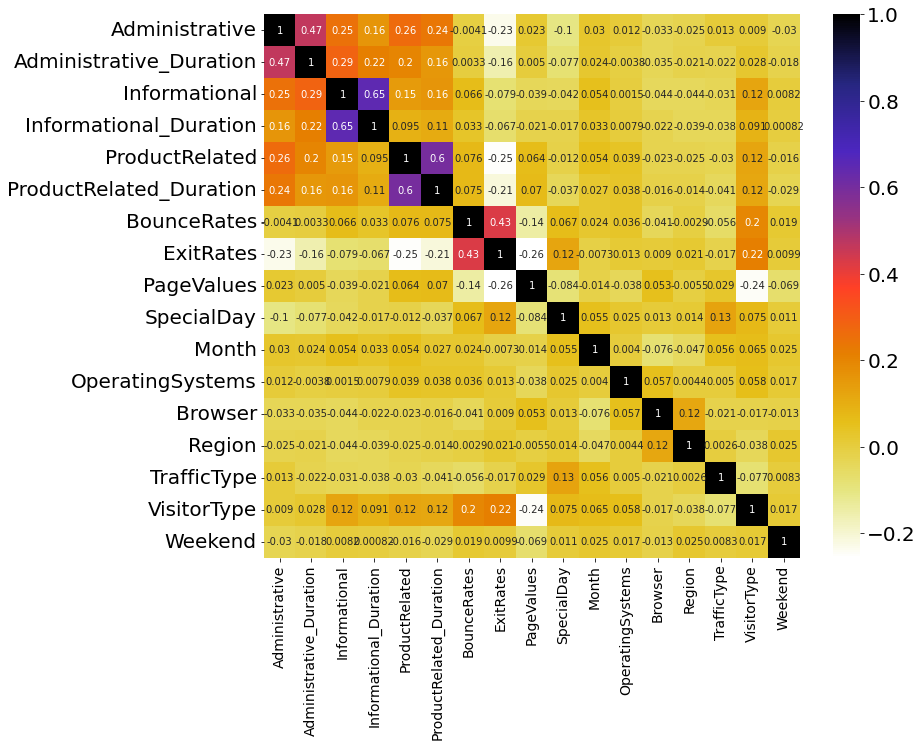

In [50]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train_oversampled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [51]:
def correlation(X_train_oversampled, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = X_train_oversampled.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [52]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))
corr_features

set()

In [53]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_oversampled,y_train_oversampled)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                      Specs          Score
5   ProductRelated_Duration  332201.563658
8                PageValues  166680.433712
1   Administrative_Duration   63514.551730
3    Informational_Duration   53815.505693
4            ProductRelated    7324.925511
0            Administrative    1403.953718
16                  Weekend     403.846237
13                   Region     209.519471
15              VisitorType     203.310310
2             Informational     189.762937
9                SpecialDay     170.460515
10                    Month      63.813982
12                  Browser      33.461596
7                 ExitRates      13.194947
11         OperatingSystems      10.221141
14              TrafficType       3.814449
6               BounceRates       2.467388


In [54]:
X_train_oversampled = X_train_oversampled.drop(['Browser','ExitRates','OperatingSystems','BounceRates','TrafficType'],axis=1)

In [55]:
x_test = x_test.drop(['Browser','ExitRates','OperatingSystems','BounceRates','TrafficType'],axis=1)

# **Model**

In [64]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_oversampled, y_train_oversampled)

print('Logistic Model Accuracy : ', log_model.score(x_test, y_test)*100, '%')

prediction = log_model.predict(x_test)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
 
print('Precision: ',precision*100, '%')
print('Recall: ',recall*100, '%')


print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))




Logistic Model Accuracy :  83.49037279803359 %
Precision:  48.29821717990275 %
Recall:  78.01047120418848 %

Confusion matrix :
[[1740  319]
 [  84  298]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      2059
           1       0.48      0.78      0.60       382

    accuracy                           0.83      2441
   macro avg       0.72      0.81      0.75      2441
weighted avg       0.88      0.83      0.85      2441



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Support Vector Machine classification

from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train_oversampled, y_train_oversampled)

print('Support Vector Classifier Accuracy : ', svc_model.score(x_test, y_test)*100, '%')

prediction = svc_model.predict(x_test)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
 
print('Precision: ',precision*100, '%')
print('Recall: ',recall*100, '%')


print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Support Vector Classifier Accuracy :  80.2130274477673 %
Precision:  44.67153284671533 %
Recall:  80.10471204188482 %

Confusion matrix :
[[1719  340]
 [ 143  239]]

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.88      2059
           1       0.41      0.63      0.50       382

    accuracy                           0.80      2441
   macro avg       0.67      0.73      0.69      2441
weighted avg       0.84      0.80      0.82      2441



In [ ]:
# Random Forest classification

from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_estimators=250,
                                            max_depth=12,
                                            min_samples_leaf=16)

RandomForest_model.fit(X_train_oversampled, y_train_oversampled)

print('Random Forest Model Accuracy : ', RandomForest_model.score(x_test, y_test)*100, '%')

precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

print('Precision: ',precision*100, '%')
print('Recall: ',recall*100, '%')

prediction = RandomForest_model.predict(x_test)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

Random Forest Model Accuracy :  86.93158541581319 %
Precision:  41.278065630397236 %
Recall:  62.56544502617801 %

Confusion matrix :
[[1827  232]
 [  87  295]]

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2059
           1       0.56      0.77      0.65       382

    accuracy                           0.87      2441
   macro avg       0.76      0.83      0.78      2441
weighted avg       0.89      0.87      0.88      2441



**hyperparameter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

import time

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X_train_oversampled, y_train_oversampled)
# Summarize results
print("Best: %f using %s" % ((grid_result.best_score_)*100, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 81.809905 using {'C': 2.0, 'dual': False, 'max_iter': 100}
Execution time: 11.761502027511597 ms


In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid.fit(X_train_oversampled, y_train_oversampled)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))
grid_prediction=grid.predict(x_test)

print(classification_report(y_test, grid_predictions))
print('the accuracy is',(grid_predictions))

The best parameters are {'max_features': 5, 'n_estimators': 170} with a score of 0.93
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2059
           1       0.39      0.26      0.31       382

    accuracy                           0.82      2441
   macro avg       0.63      0.59      0.60      2441
weighted avg       0.80      0.82      0.81      2441

the accuracy is [0 0 0 ... 0 0 1]


In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

svc_model = SVC()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_oversampled, y_train_oversampled)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
grid_predictions = grid.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))




Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=  11.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=  11.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=  11.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.514 total time=  11.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=  11.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.550 total time=  12.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.547 total time=  12.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.548 total time=  12.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.547 total time=  12.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.553 total time=  12.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.657 total time=  12.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf